# CLUSTERING MODEL B

IN THIS CLUSTERING THE MODEL IS USING 2 FEATURES WHICH IS **'MODEL' AND 'MANUFACTURER'**

*   THE CLUSTERING PROCESS THAT IS USED IN THIS MODEL IS **K-MEANS ALGORITHM**
*   THERE ARE **IMPUTATION OF THE MISSING VALUE** USING THE MODUS OF THE DATA IN THIS MODEL
*   THERE ARE NORMALIZATION OF THE DATA USING **STANDARD NORMALIZATION** IN THIS MODEL


In [0]:
from google.colab import files
uploaded = files.upload()

Saving used_cars.csv to used_cars (1).csv


**Read the Dataset**

In [0]:
import pandas as pd
import io
df = pd.read_csv(io.BytesIO(uploaded['used_cars.csv']))

In [0]:
df.head()

**Feature Engineering**

In this phase we do the feature engineering to our datasets

1. Drop the Unnecesary Columns

in this phase we drop all the columns exept 'State' and 'Region' columns, since the data that we are using to clustering is 'State' and 'Region'

In [0]:
# drop some columns
df = df.drop(columns=['region_url', 'image_url','Unnamed: 0', 'year', 'price', 'county','url','cylinders',
                      'title_status','vin','paint_color', 'description','long','lat','size','condition',
                      'id','state','region','fuel','odometer','transmission','drive','type'])

2. Fill the missing value on the features

In [0]:
categorical = ['manufacturer','model']
for cat in categorical:
    df[cat] = df[cat].fillna(df[cat].mode().values[0])

In [0]:
df.isnull().sum()

manufacturer    0
model           0
dtype: int64

3. **Encode the Columns**, in this phase we transform the non numerical labels  which is 'manufacturer' and 'model' to numerical labels

In [0]:
#import skleaen 
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

manufacturer          = le.fit_transform(df['manufacturer'])
model                 = le.fit_transform(df['model'])

df['manufacturer'] = manufacturer
df['model'] = model

In [0]:
df

,manufacturer,model
0,38,2197
1,12,1764
2,13,3285
3,12,1764
4,12,1843
...,...,...
19996,32,1379
19997,29,3242
19998,19,2224
19999,37,1276


4. **Data Normalization** , in this phase we normalize the data that we are going to use using StandardScaler()

In [0]:
from sklearn.preprocessing import StandardScaler
#assign the StandardScaler()
scaler = StandardScaler()
newarr = scaler.fit_transform(df)
newarr


array([[ 1.7724115 ,  0.03629791],
       [-0.60566608, -0.34136722],
       [-0.51420155,  0.98525786],
       ...,
       [ 0.03458558,  0.05984747],
       [ 1.68094698, -0.76700367],
       [ 1.68094698, -1.55547775]])

In [0]:
# change the normalize result to the dataframe
#change newarr to xdf
xdf =pd.DataFrame(data = newarr,columns=['manufacturer','model',])
xdf

,manufacturer,model
0,1.772412,0.036298
1,-0.605666,-0.341367
2,-0.514202,0.985258
3,-0.605666,-0.341367
4,-0.605666,-0.272463
...,...,...
19996,1.223624,-0.677166
19997,0.949231,0.947753
19998,0.034586,0.059847
19999,1.680947,-0.767004


In [0]:
#save the data exploration result to csv
xdf.head()
xdf.to_csv('clusteringmodB.csv')

**Plot The Data** , in this phase we trying to visualize the data that we are going to use as our clustering label.

we are using **Manufacturer** and **Model** as the data that we are going to clusters 

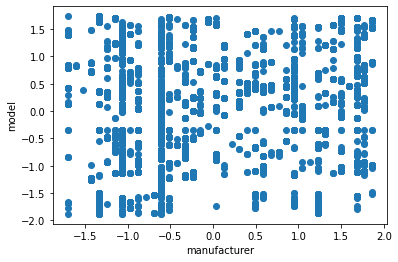

In [0]:
#import the library, and plot the data 
import matplotlib.pyplot as plt
fig = plt.figure()
plt.plot(xdf['manufacturer'], xdf['model'], 'o')
plt.xlabel('manufacturer')
plt.ylabel('model')
plt.show()

In [0]:
#change our previous dataframe into array
#change xdf to newdf
#import the numpy library

import numpy as np
newdf = np.array(xdf)
newdf

array([[ 1.7724115 ,  0.03629791],
       [-0.60566608, -0.34136722],
       [-0.51420155,  0.98525786],
       ...,
       [ 0.03458558,  0.05984747],
       [ 1.68094698, -0.76700367],
       [ 1.68094698, -1.55547775]])

**K-MEANS CLUSTERING PROCESS**

in this phase we begin to do the clustering process

- **elbow method to define the optimal K**

from the elbow method below we know that the optimal value of k for our clustering is 4



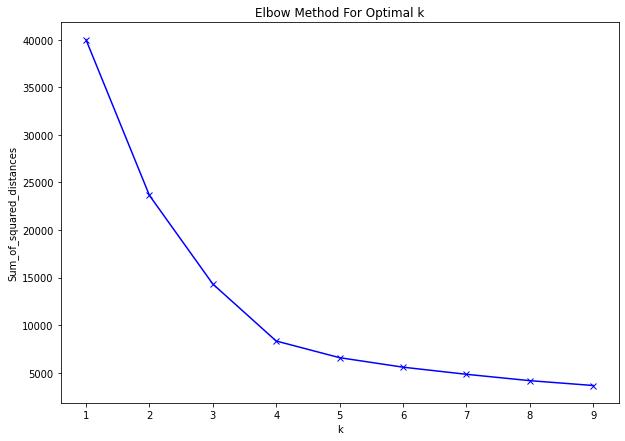

In [0]:
from sklearn.cluster import KMeans
Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(xdf)
    Sum_of_squared_distances.append(km.inertia_)
plt.figure(figsize=(10,7))
plt.plot(K, Sum_of_squared_distances,'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [0]:
#in this process, we shape the data
# we assign 'm' as our number of training data (m is 20001)
# we assign n as our number of features (n is 2)
m = newdf.shape[0] 
n = newdf.shape[1] 

In [0]:
m

20001

In [0]:
n

2

*   Assign the **K Value**

In [0]:
K= 4

*   **Initialize the Centroids** randomly from our data points

In [0]:
Centroids=np.array([]).reshape(n,0)

In [0]:
Centroids

array([], shape=(2, 0), dtype=float64)

In [0]:
import random
for i in range(K):
    rand=random.randint(700,m-1)
    Centroids=np.c_[Centroids,newdf[rand]]
    Output={}

In [0]:
Centroids

array([[ 1.68094698,  0.1260501 , -0.97152416, -1.42884677],
       [-1.11675821,  0.80558346,  1.40740549, -1.22229512]])

**Compute the Euclidian Distance** from the centroids and assign the cluster base on the minimal distance

In [0]:
#initialize the euclidian distance
EuclideDist=np.array([]).reshape(m,0)
for k in range(K):
       #compute the euclidian distance (find the minimum distance)
       tempDist=np.sum((newdf-Centroids[:,k])**2,axis=1)
       EuclideDist=np.c_[EuclideDist,tempDist]
#store the  minimum ditance and the index to C
C = np.argmin(EuclideDist,axis=1)+1

In [0]:
tempDist

In [0]:
C

array([1, 4, 3, ..., 2, 1, 1])

In [0]:
EuclideDist

array([[ 1.33790418,  3.30230611,  9.40911892, 11.83211095],
       [ 5.82983044,  1.85090443,  3.19205813,  1.45366043],
       [ 9.23714865,  0.44220507,  0.38735259,  5.70986605],
       ...,
       [ 4.09490678,  0.56448793,  2.82816944,  3.78552386],
       [ 0.12232824,  4.89073458, 11.76365835,  9.87810748],
       [ 0.19247483,  7.99231433, 15.81428025,  9.78182785]])

**Compute the Clusters using K-Means Clustering**

In [0]:
#create the output dictionary A (temporary dictionary)
A={}

#Regroup the datapoints based on the cluster index C and store it on A
for k in range(K):
    A[k+1]=np.array([]).reshape(2,0)
for i in range(m):
    A[C[i]]=np.c_[A[C[i]],newdf[i]]    
for k in range(K):
    A[k+1]=A[k+1].T
for k in range(K):
     #assign the new centroids by compute the mean of clusters
     Centroids[:,k]=np.mean(A[k+1],axis=0)

In [0]:
#Repeat the step 2 until its convergence , no data points is moving.
 n_iter = 9
for i in range(n_iter):
     #step 2.a
      EuclideDist=np.array([]).reshape(m,0)
      for k in range(K):
          tempDist=np.sum((newdf-Centroids[:,k])**2,axis=1)
          EuclideDist=np.c_[EuclideDist,tempDist]
      C=np.argmin(EuclideDist,axis=1)+1
     #step 2.b
      A={}
      for k in range(K):
          A[k+1]=np.array([]).reshape(2,0)
      for i in range(m):
          A[C[i]]=np.c_[A[C[i]],newdf[i]]
     
      for k in range(K):
          A[k+1]=A[k+1].T
    
      for k in range(K):
          Centroids[:,k]=np.mean(A[k+1],axis=0)
      Output=A

In [0]:
C

array([3, 4, 1, ..., 4, 2, 2])

**Visualize the Result**

<Figure size 432x288 with 0 Axes>

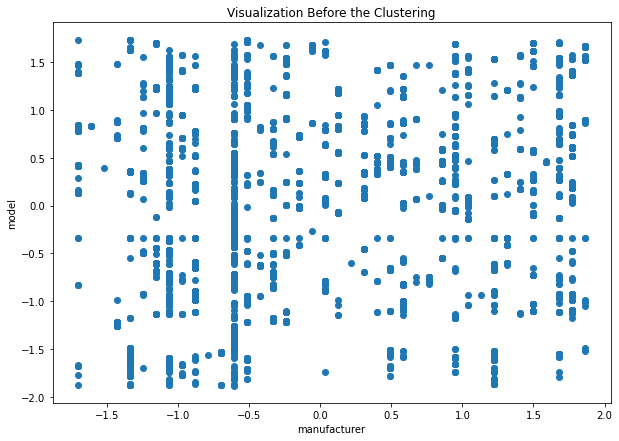

In [0]:
fig = plt.figure()
plt.figure(figsize=(10,7))
plt.title('Visualization Before the Clustering')
plt.xlabel('manufacturer')
plt.ylabel('model')
plt.plot(xdf['manufacturer'], xdf['model'], 'o')
plt.show()

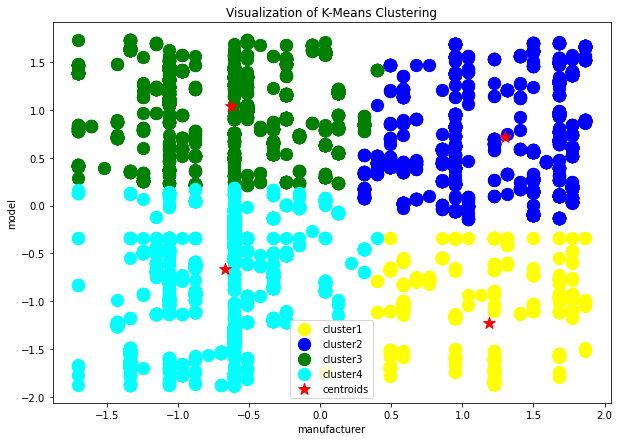

In [0]:
#Visualization after the data being clustered
color=['yellow','blue','green','cyan']
labels=['cluster1','cluster2','cluster3','cluster4']
plt.figure(figsize=(10,7))
for k in range(K):
    plt.scatter(Output[k+1][:,0],Output[k+1][:,1],c=color[k],s=150,label=labels[k])
plt.title('Visualization of K-Means Clustering')
plt.scatter(Centroids[0,:],Centroids[1,:],s=150,c='red',marker='*',label='centroids')
plt.xlabel('manufacturer')
plt.ylabel('model')
plt.legend()
plt.show()

In [0]:
C

array([2, 4, 3, ..., 4, 1, 1])

In [0]:
newC =pd.DataFrame(C)
newC

,0
0,3
1,4
2,1
3,4
4,4
...,...
19996,2
19997,3
19998,4
19999,2


**Result of the Centroids**

		
1. The first centroid (centroid 0 at cluster 1) at label x = 1.296870 and y = 0.717348
2. The second Centroid (centroid 1 at cluster 2) at label x = -0.624799 and y =1.039226
3. The third centroid (centroid 2 at cluster 3) at label x = 1.190295 and y = -1.226442
4. The fourth centroid (centroid 3 at cluster 4) at label x = -0.667993 and y = -0.663912

In [0]:
Centroids = pd.DataFrame (data= Centroids)

In [0]:
Centroids

,0,1,2,3
0,1.190295,1.296870,-0.624799,-0.667993
1,-1.226442,0.717348,1.039226,-0.663912


**Result of the Clusters**

in this phase we assign all the member of clusters to a dataframe
- column 0 of the data frame means that  label x (manufacturer points) and column 1 means that label y (model points)

**Result**
- cluster 1  has 4187 of data member
- cluster 2 has 5273 of data member
- cluster 3 has 2640 of data member
- cluster 4 has 7901 of data  member

so the cluster 4 is the biggest cluster, since its has biggger data member that other clusters

In [0]:
# assign the value data points that member of cluster 1 into dataframe
Cluster1 = pd.DataFrame(data = Output[1])
Cluster1

,0,1
0,1.223624,-0.341367
1,1.223624,-0.341367
2,1.223624,-0.341367
3,1.223624,-1.735152
4,1.223624,-1.600832
...,...,...
2635,1.680947,-0.767004
2636,0.766302,-0.772237
2637,1.223624,-0.677166
2638,1.680947,-0.767004


In [0]:
# assign the value data points that member of cluster 2 into dataframe
Cluster2 = pd.DataFrame(data = Output[2])
Cluster2

,0,1
0,1.772412,0.036298
1,1.680947,1.485904
2,0.583373,0.864893
3,1.498018,0.558749
4,1.680947,1.485904
...,...,...
4182,1.680947,0.102586
4183,1.680947,1.313207
4184,0.949231,0.473273
4185,1.498018,1.616735


In [0]:
# assign the value data points that member of cluster 3 into dataframe
Cluster3 = pd.DataFrame(data = Output[3])
Cluster3

,0,1
0,-0.514202,0.985258
1,-0.514202,0.984386
2,-0.514202,1.704828
3,-0.514202,0.984386
4,-0.514202,0.984386
...,...,...
5268,0.034586,1.606268
5269,-1.611776,0.831750
5270,-1.062989,1.117833
5271,0.034586,1.592313


In [0]:
# assign the value data points that member of cluster 4 into dataframe
Cluster4 = pd.DataFrame(data = Output[4])
Cluster4

,0,1
0,-0.605666,-0.341367
1,-0.605666,-0.341367
2,-0.605666,-0.272463
3,-0.605666,-0.293396
4,-0.605666,-0.311712
...,...,...
7896,0.034586,0.064208
7897,-0.605666,-0.373639
7898,-1.062989,-0.472198
7899,-0.605666,-0.248913


In [0]:
df['Clusters'] = C
df

,manufacturer,model,Clusters
0,38,2197,3
1,12,1764,4
2,13,3285,1
3,12,1764,4
4,12,1843,4
...,...,...,...
19996,32,1379,2
19997,29,3242,3
19998,19,2224,4
19999,37,1276,2


In [0]:
dfclusters

,manufacturer,model
0,38,2197
1,12,1764
2,13,3285
3,12,1764
4,12,1843
...,...,...
19996,32,1379
19997,29,3242
19998,19,2224
19999,37,1276
